## Generating a dataset

The two DataFrames need to be combined by merging on the smiles entry. After some processing, the cleaned data should be inspected via a quick EDA. The Hypothesis "lower lipophilicity leads to lower MIC" shall then be tested on the most effective compounds in the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
act = pd.read_csv("ecoli_mics.csv")
desc = pd.read_csv("ecoli_pubchem_descr.csv")

Drop all rows with NaN and duplicates.

In [47]:
act_clean = act.dropna()

In [48]:
act_clean = act_clean[act_clean["standard_units"]=="ug.mL-1"]

In [49]:
act_clean.shape

(242, 7)

Drop duplicates in the descriptor set

In [50]:
desc.drop_duplicates(inplace=True)

Combine the two datasets.

In [51]:
# Merge on canonical_smiles, how="inner" drops all rows which are only contained in one df
merged = pd.merge(act_clean, desc, on="canonical_smiles", how="inner") 

print(f"Merged dataset: {len(merged)} entries")
merged.head(20)

Merged dataset: 242 entries


,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,assay_chembl_id,CID,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount
0,CHEMBL3621433,Cc1ccc(N(CC#N)Cc2ccc(F)cc2F)cc1,MIC,'=',128.000,ug.mL-1,CHEMBL3625335,122191175.0,272.29,3.9,27.0,0.0,4.0,4.0,20.0
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+],MIC,'<=',0.120,ug.mL-1,CHEMBL5247824,71535518.0,269.21,NaN,122.0,0.0,6.0,2.0,17.0
2,CHEMBL2236659,O=C(/C=C/c1c(Cl)cccc1Cl)c1ccc[nH]1,MIC,'=',15.600,ug.mL-1,CHEMBL3061488,76329794.0,266.12,4.1,32.9,1.0,1.0,3.0,17.0
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1,MIC,'<=',0.030,ug.mL-1,CHEMBL4123733,145960871.0,280.09,NaN,84.1,2.0,5.0,4.0,21.0
4,CHEMBL296800,COc1cc2oc(-c3ccccc3)cc(=O)c2c(O)c1O,MIC,'>',125.000,ug.mL-1,CHEMBL682907,471719.0,284.26,3.0,76.0,2.0,5.0,2.0,21.0
5,CHEMBL5414996,O=C(O)c1nccn1CCc1ccc([N+](=O)[O-])cc1,MIC,'=',8.000,ug.mL-1,CHEMBL5360869,172452890.0,261.23,1.6,101.0,1.0,5.0,4.0,19.0
6,CHEMBL575061,O=c1ccsn1-c1ccc(Cl)cc1,MIC,'=',10.000,ug.mL-1,CHEMBL1052821,12368338.0,211.67,2.2,45.6,0.0,2.0,1.0,13.0
7,CHEMBL5573576,O=C(Nc1ccccn1)c1ccc2c(c1)OCCCO2,MIC,'=',12.500,ug.mL-1,CHEMBL5529142,51251686.0,270.28,2.1,60.5,1.0,4.0,2.0,20.0
8,CHEMBL3275000,C=C(C)c1cnc([N+](=O)[O-])n1C,MIC,'>',100.000,ug.mL-1,CHEMBL3280883,116559.0,167.17,1.3,63.6,0.0,3.0,1.0,12.0
9,CHEMBL503112,CC1CCN(c2ncnc3c2ncn3C2CCCC2)CC1,MIC,'=',50.000,ug.mL-1,CHEMBL1033185,44591065.0,285.39,3.0,46.8,0.0,4.0,2.0,21.0


Now, inspect the combined dataframe. Look for abnomalies, i.e. duplicates and missing data.

In [54]:
merged["standard_value"].nlargest(20)

127    31000.0
174     6250.0
161     2000.0
23      1620.0
134     1024.0
200     1000.0
25       800.0
26       800.0
40       800.0
223      800.0
11       512.0
32       512.0
75       512.0
89       512.0
227      500.0
205      400.0
240      400.0
207      300.0
35       256.0
47       256.0
Name: standard_value, dtype: float64

Filter from the dataframe all entries with a MIC < 10 (potential candidates as antibiotic).

In [ ]:
df = merged[merged["standard_value"]<10]
df.shape

(85, 15)

In [72]:
df["standard_value"].nlargest(10)

131    9.00
5      8.00
12     8.00
27     8.00
85     8.00
123    8.00
130    8.00
147    8.00
181    7.80
125    6.82
Name: standard_value, dtype: float64

Run a quick EDA on the cleaned dataset including some plots. What can you conclude?

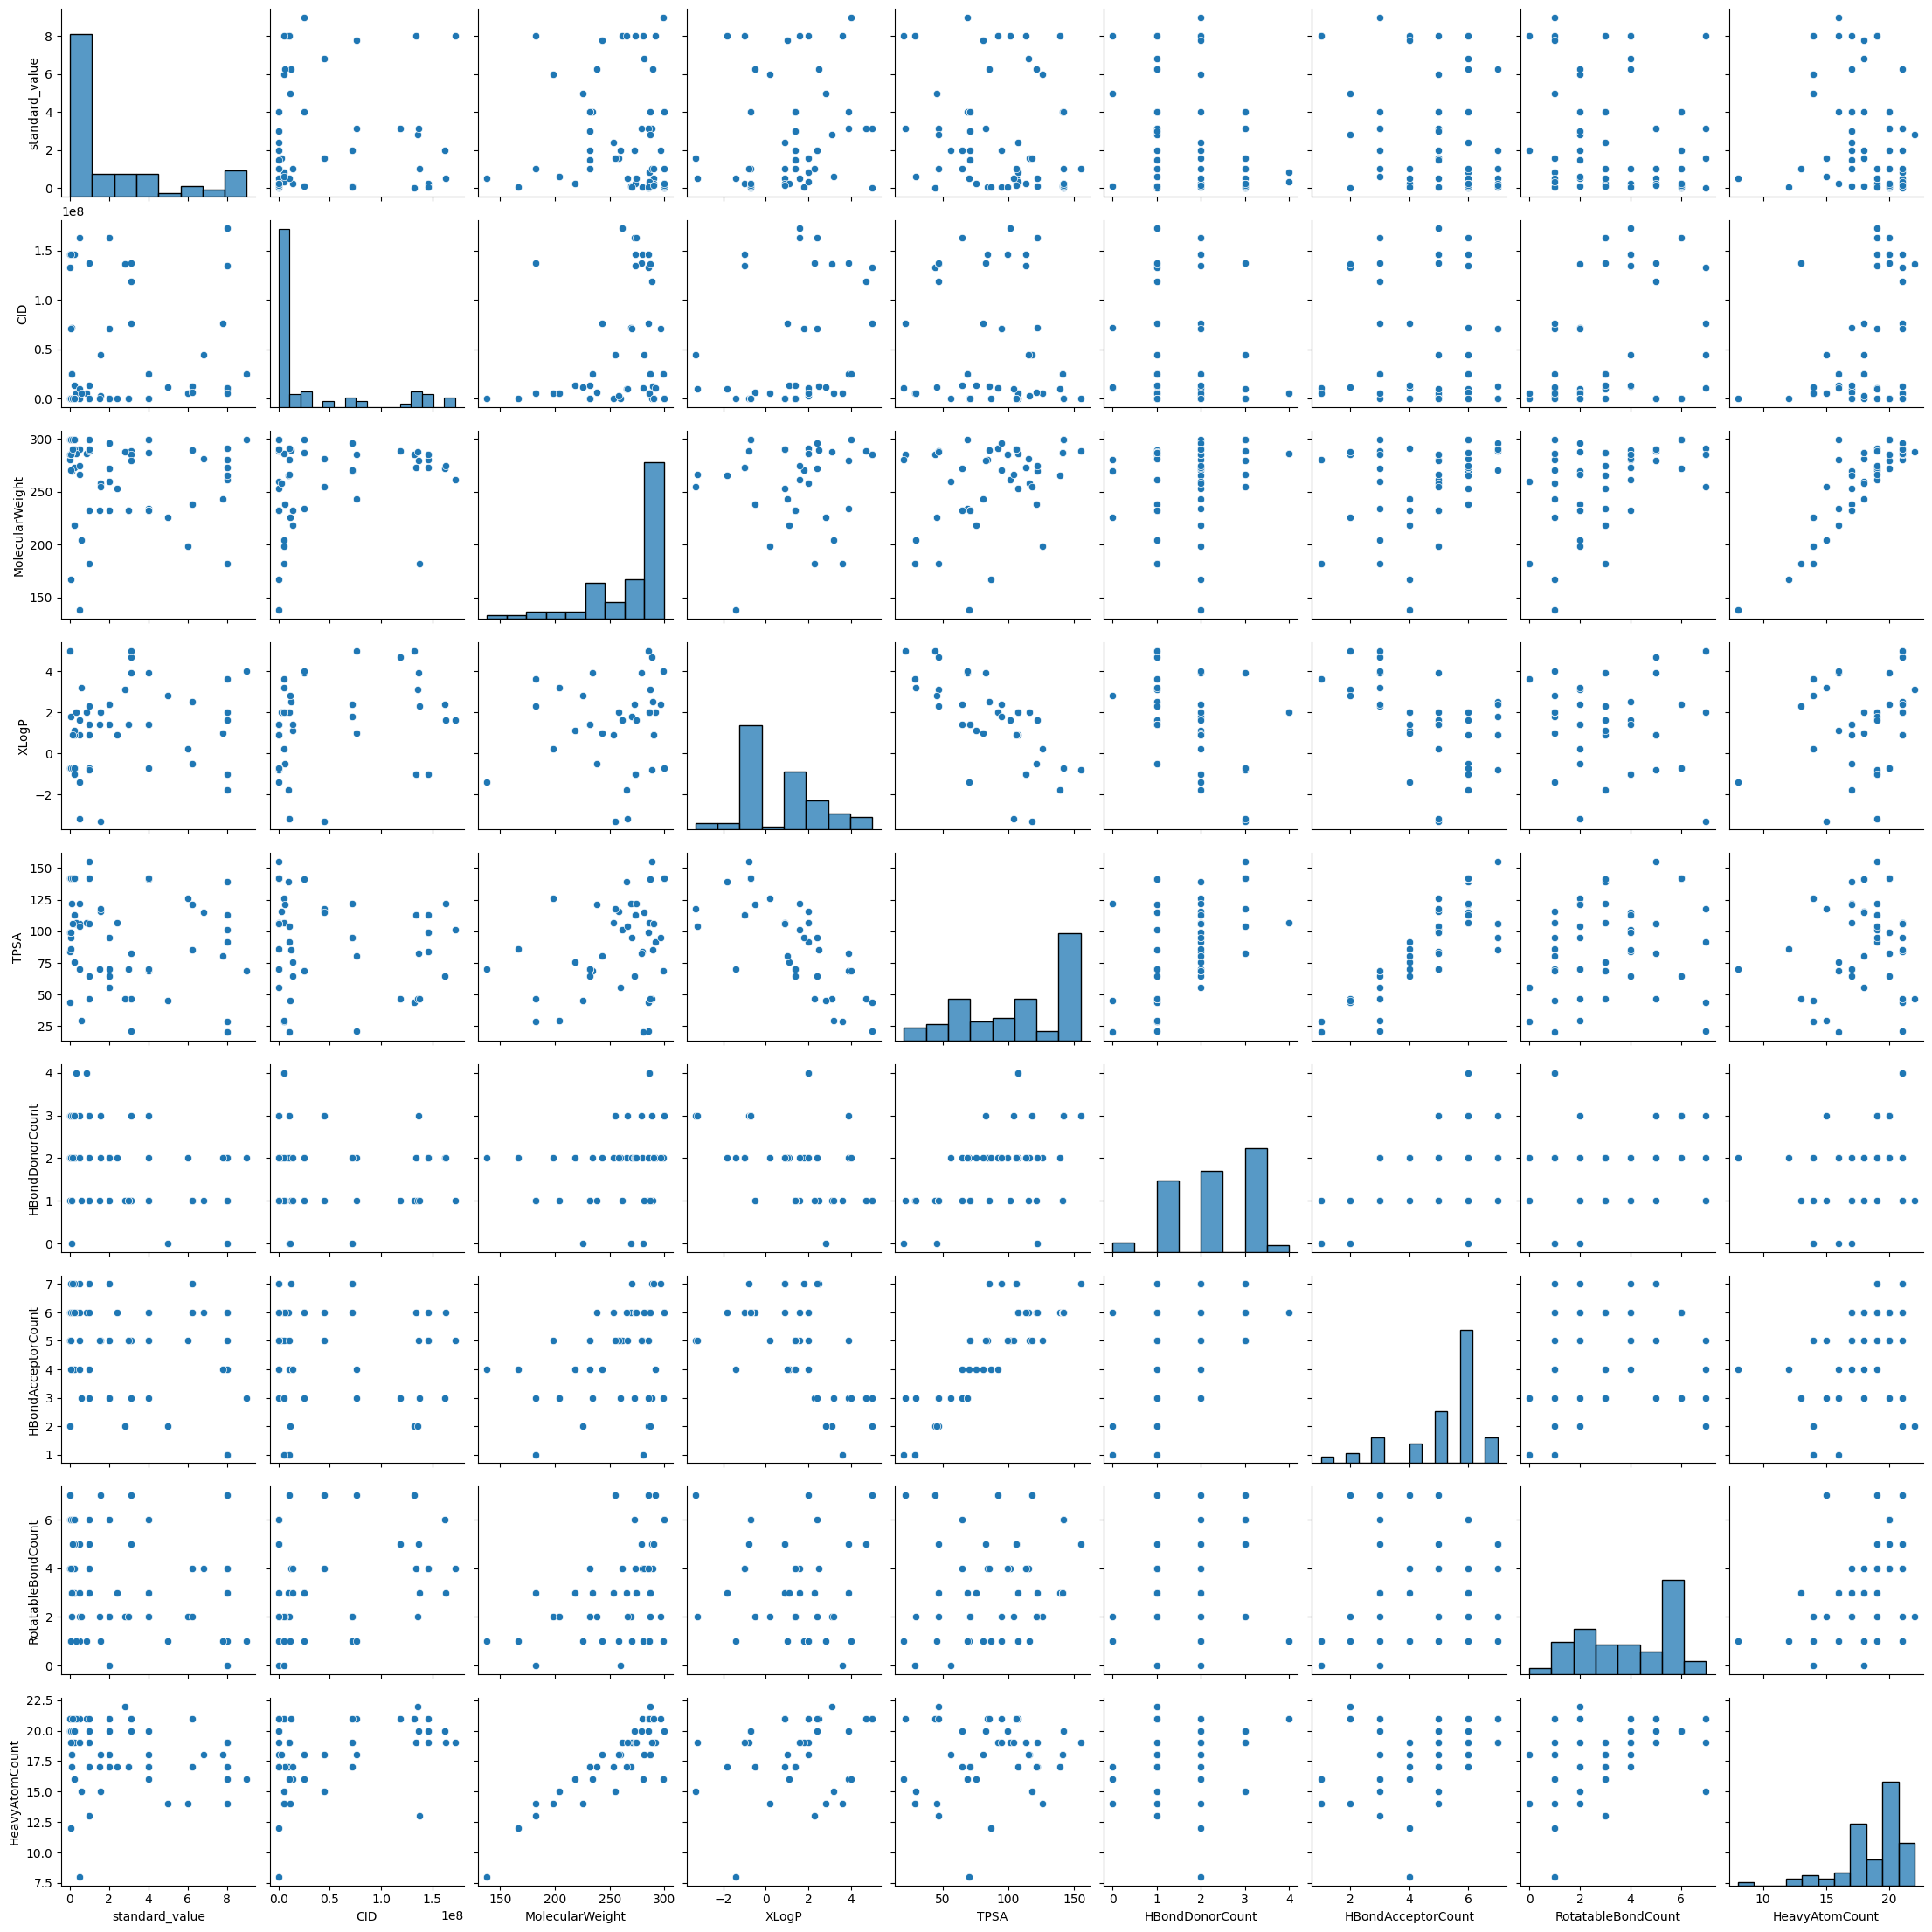

In [73]:
sns.pairplot(data=df)
plt.show()

## Hypothesis testing

In [74]:
from scipy import stats

Devide the population in two groups with higher and lower lipophilicity:

In [82]:
# Define high/low lipophilicity groups
df["high_logp"] = df["XLogP"] < 1
df.head()

C:\Users\jschoer\AppData\Local\Temp\ipykernel_11172\3638418093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["high_logp"] = df["XLogP"] < 1


,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,assay_chembl_id,CID,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount,high_logp
1,CHEMBL4450418,N#C[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)[O-].[Na+],MIC,'<=',0.120,ug.mL-1,CHEMBL5247824,71535518.0,269.21,NaN,122.0,0.0,6.0,2.0,17.0,False
3,CHEMBL4127175,OB(O)c1ccc(Cn2cc(-c3ccccn3)nn2)cc1,MIC,'<=',0.030,ug.mL-1,CHEMBL4123733,145960871.0,280.09,NaN,84.1,2.0,5.0,4.0,21.0,False
5,CHEMBL5414996,O=C(O)c1nccn1CCc1ccc([N+](=O)[O-])cc1,MIC,'=',8.000,ug.mL-1,CHEMBL5360869,172452890.0,261.23,1.6,101.0,1.0,5.0,4.0,19.0,False
12,CHEMBL1689063,NC(=O)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)(=O)O,MIC,'=',8.000,ug.mL-1,CHEMBL5259975,9835049.0,265.25,-1.8,139.0,2.0,6.0,3.0,17.0,True
14,CHEMBL4204019,CCCCCCc1ccc(-c2cn(C(C)C)c(N)n2)cc1,MIC,'=',0.016,ug.mL-1,CHEMBL4179301,132539946.0,285.40,5.0,43.8,1.0,2.0,7.0,21.0,False


Calculate the mean MIC, as well as std dev. and variance for the two groups

In [83]:
group_high = df[df["high_logp"] == True]["standard_value"]
group_low = df[df["high_logp"] == False]["standard_value"]

print("size_high: ", group_high.size)
print("size_low: ", group_low.size, "\n")

mean_high = group_high.mean()
mean_low = group_low.mean()

print("mean_high: ", mean_high)
print("mean_low: ", mean_low, "\n")

var_high = group_high.var()
var_low = group_low.var()

print("var_high: ", var_high)
print("var_low: ", var_low)

size_high:  42
size_low:  43 

mean_high:  1.1822142857142857
mean_low:  3.0064790697674413 

var_high:  4.6180310505226485
var_low:  8.17138217883721


Two sample t-test

In [84]:
# t-test

t_value, p_value = stats.ttest_ind(group_high, group_low, equal_var=False, nan_policy="omit")
print(f"t_value = {t_value:.2f}, p_value = {p_value:.4f}")

t_value = -3.33, p_value = 0.0013
